In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Open the zip into the dataset folder if this does not work for you

df = pd.read_csv("dataset/Impact_of_Remote_Work_on_Mental_Health.csv")

# Display general information about the dataset
display(df.info())
display(df.describe())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

None

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


In [8]:
#### Data preprocessing ####
import matplotlib.pyplot as plt
import seaborn as sns

# Remove entire rows if there is a NaN in columns other than Mental_Health_Condition
df = df.dropna(subset=[col for col in df.columns if col != "Mental_Health_Condition"])

# Label encoding #
df = df.drop('Employee_ID', axis=1) # Employee_ID is just another index, we dont need.

# Features that are just categories, dont have hierarchical values
categorical_features = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 
                        'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                        'Region', 'Stress_Level', 'Satisfaction_with_Remote_Work', 
                        'Sleep_Quality', 'Company_Support_for_Remote_Work', 'Productivity_Change', 'Physical_Activity']

# Loop through each categorical feature and display its unique categories so we can make an accurate category mapping
for feature in categorical_features:
    if feature in df.columns:
        unique_values = df[feature].unique() # Get the unique categories available for each feature
        print(f"Unique categories for '{feature}': {unique_values}\n")

# Define mappings for each categorical feature
mappings = {
    'Gender': {
        'Non-binary': 0, 
        'Female': 1, 
        'Male': 2, 
        'Prefer not to say': 3
    },
    'Job_Role': {
        'HR': 0, 
        'Data Scientist': 1, 
        'Software Engineer': 2, 
        'Sales': 3, 
        'Marketing': 4, 
        'Designer': 5,
        'Project Manager': 6
    },
    'Industry': {
        'Healthcare': 0, 
        'IT': 1, 
        'Education': 2, 
        'Finance': 3, 
        'Consulting': 4, 
        'Manufacturing': 5,
        'Retail': 6
    },
    'Work_Location': {
        'Hybrid': 0, 
        'Remote': 1, 
        'Onsite': 2
    },
    'Mental_Health_Condition': { # Our target vairable
        'Depression': 0, 
        'Anxiety': 1, 
        'Burnout': 2, 
        np.nan: 3  # Encoding NaN as a separate category - means no mental health condition reported
    },
    'Access_to_Mental_Health_Resources': {
        'No': 0, 
        'Yes': 1
    },
    'Region': {
        'Europe': 0, 
        'Asia': 1, 
        'North America': 2, 
        'South America': 3, 
        'Oceania': 4, 
        'Africa': 5
    },
    'Stress_Level': {
        'Low': 0, 
        'Medium': 1, 
        'High': 2
    },
    'Satisfaction_with_Remote_Work': {
        'Unsatisfied': 0, 
        'Neutral': 1, 
        'Satisfied': 2
    },
    'Sleep_Quality': {
        'Poor': 0, 
        'Average': 1, 
        'Good': 2
    },
    'Company_Support_for_Remote_Work': {
        1: 0, 
        2: 1, 
        3: 2, 
        4: 3, 
        5: 4
    },
    'Productivity_Change': {
        'Decrease': 0, 
        'No Change': 1, 
        'Increase': 2
    },
    'Physical_Activity': {
        'Daily': 0, 
        'Weekly': 1, 
        np.nan: 2 
    }
}

# Step 2: Apply the mappings to the DataFrame
for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

# If youre wondering why I did a manual mapping instead of using LabelEncoder, its because I tried LabelEncoder and its labels didn't make sense. They didn't follow the heirarchy of the categories.
print('Here is the dataset after label encoding:')
display(df)

Unique categories for 'Gender': ['Non-binary' 'Female' 'Male' 'Prefer not to say']

Unique categories for 'Job_Role': ['HR' 'Data Scientist' 'Sales' 'Software Engineer' 'Marketing' 'Designer'
 'Project Manager']

Unique categories for 'Industry': ['Healthcare' 'IT' 'Consulting' 'Finance' 'Manufacturing' 'Retail'
 'Education']

Unique categories for 'Work_Location': ['Hybrid' 'Remote' 'Onsite']

Unique categories for 'Mental_Health_Condition': ['Depression' 'Anxiety' nan 'Burnout']

Unique categories for 'Access_to_Mental_Health_Resources': ['No' 'Yes']

Unique categories for 'Region': ['Europe' 'Asia' 'North America' 'Oceania' 'Africa' 'South America']

Unique categories for 'Stress_Level': ['Medium' 'High' 'Low']

Unique categories for 'Satisfaction_with_Remote_Work': ['Unsatisfied' 'Satisfied' 'Neutral']

Unique categories for 'Sleep_Quality': ['Good' 'Average' 'Poor']

Unique categories for 'Company_Support_for_Remote_Work': [1 2 3 4 5]

Unique categories for 'Productivity_Change': 

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,0,0,0,13,0,47,7,2,1,0,0,0,1,0,0,1,2,0
1,40,1,1,1,3,1,52,4,1,1,1,0,2,3,2,1,1,2,1
4,49,2,3,4,32,2,35,12,2,2,3,1,0,3,0,2,1,1,2
6,31,3,3,1,24,1,51,7,3,0,1,1,0,5,1,2,0,0,1
8,56,3,1,0,9,0,24,4,2,2,3,1,0,2,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,35,0,4,6,12,0,32,13,5,1,3,1,0,2,2,2,0,2,1
4994,40,3,4,1,17,0,52,1,2,1,2,1,2,3,1,4,0,2,4
4995,32,2,3,4,4,2,24,2,5,2,2,1,0,4,1,0,1,1,1
4997,42,1,3,0,21,0,34,1,4,2,2,0,2,3,2,0,0,0,4


Here is the correlation heatmap:


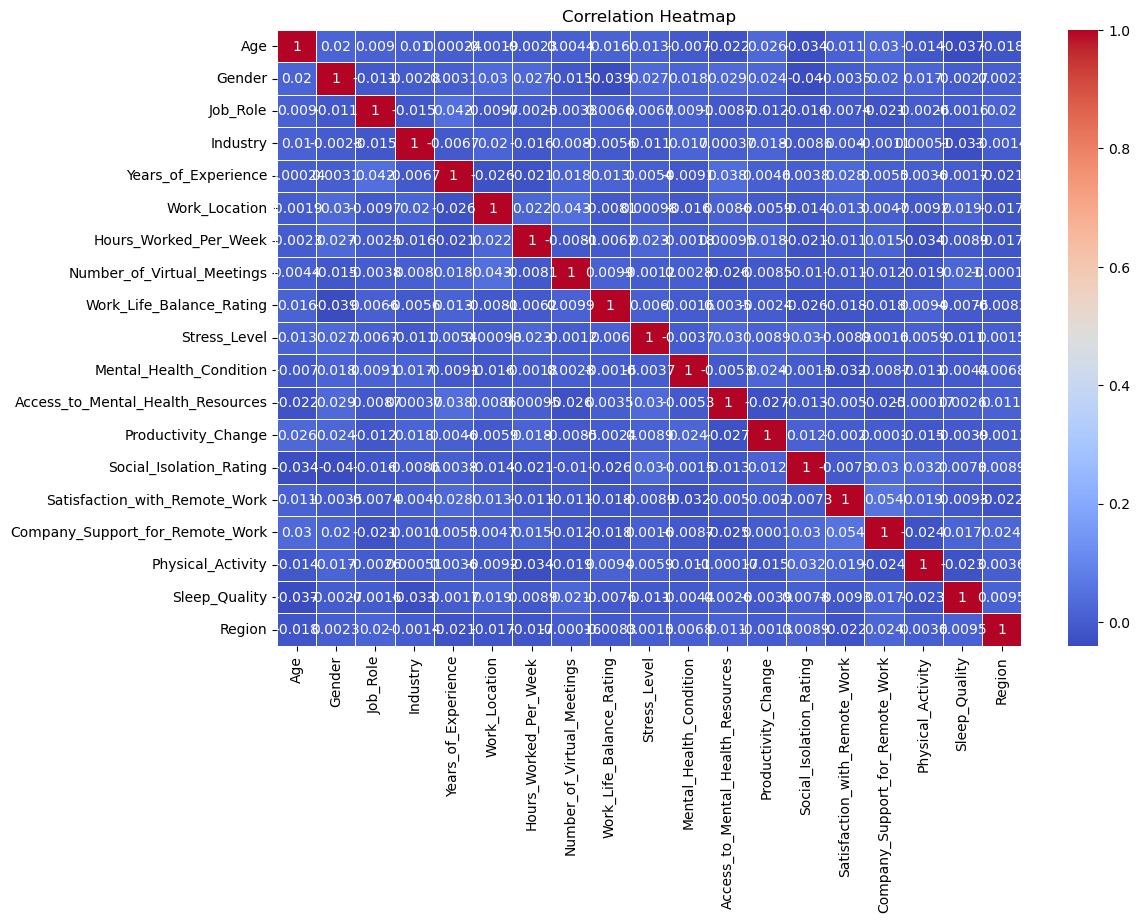

There are no significant correlations, we will have to base our feature selection on a different methods


In [72]:
# Check for multicolinarity (Mohand):

# We will check for multicolinearity using a correlation matrix heatmap
correlation_matrix = df.corr()

print('Here is the correlation heatmap:')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
print('There are no significant correlations, we will have to base our feature selection on a different methods')

Line plot visualizations:


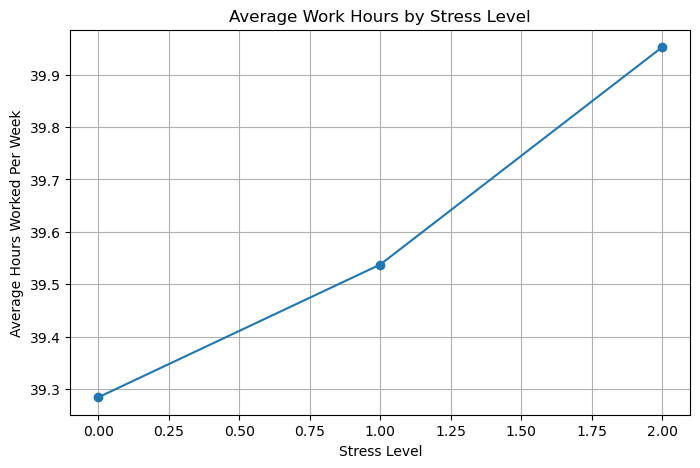

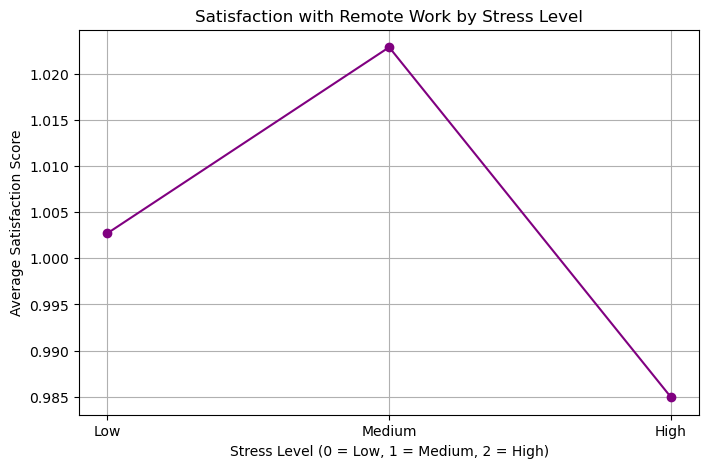

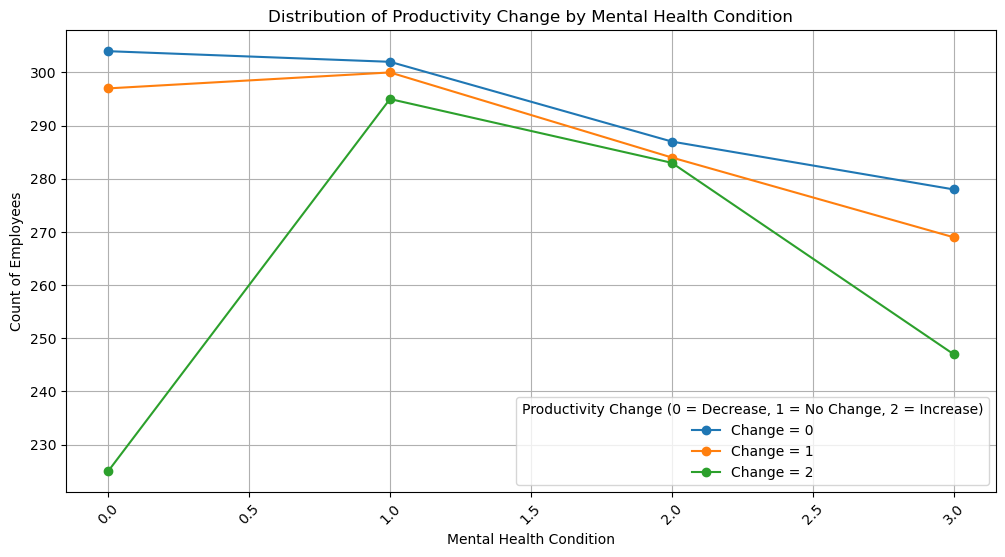

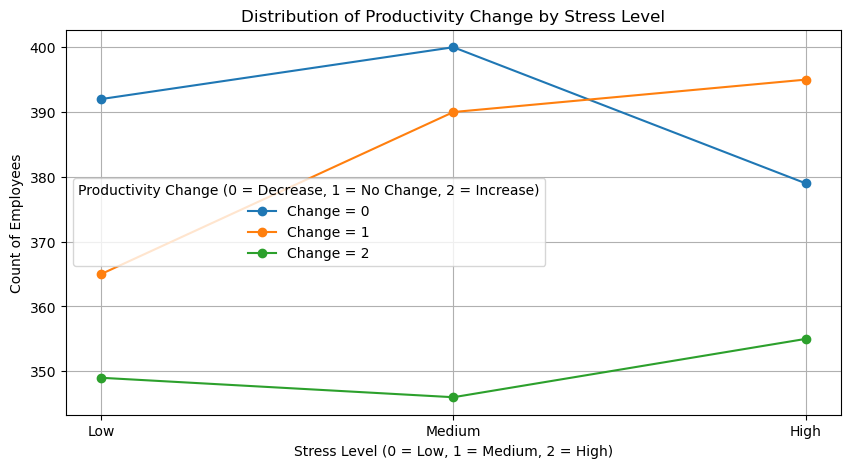

Area plot visualizations:


<Figure size 1000x600 with 0 Axes>

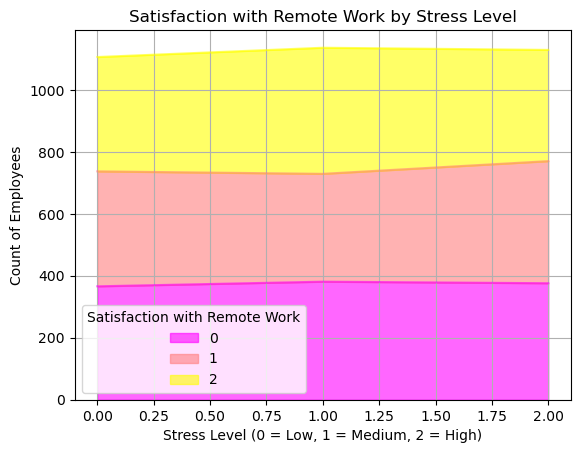

<Figure size 1000x600 with 0 Axes>

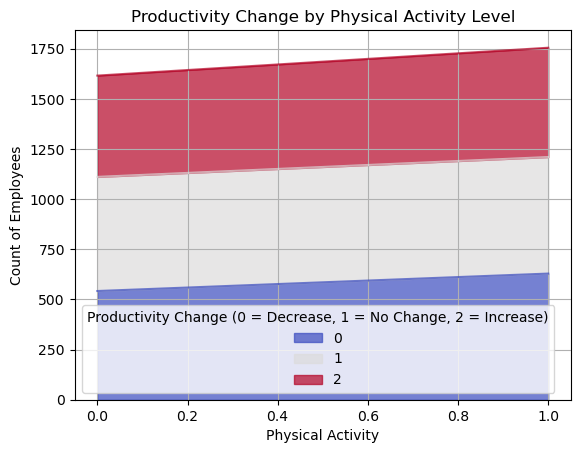

In [73]:
### Data Visualization ###

# Line graphs (Mohand):

print('Line plot visualizations:')

# Line graph for Average Work Hours by Stress Level
# Group by Stress Level and calculate the average Hours Worked Per Week
avg_hours_by_stress = df.groupby('Stress_Level')['Hours_Worked_Per_Week'].mean()

plt.figure(figsize=(8, 5))
plt.plot(avg_hours_by_stress.index, avg_hours_by_stress.values, marker='o')
plt.title('Average Work Hours by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Hours Worked Per Week')
plt.grid(True)
plt.show()

# Line graph for Satisfaction with Remote Work by Stress Level
# Group by Stress Level and Satisfaction with Remote Work
satisfaction_by_stress = df.groupby('Stress_Level')['Satisfaction_with_Remote_Work'].mean()

plt.figure(figsize=(8, 5))
plt.plot(satisfaction_by_stress.index, satisfaction_by_stress.values, marker='o', linestyle='-', color='purple')
plt.title('Satisfaction with Remote Work by Stress Level')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Average Satisfaction Score')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(True)
plt.show()

# Line graph for Productivity Change by Mental Health Condition
# Group by Mental Health Condition and count for each Productivity Change
condition_productivity_distribution = df.groupby('Mental_Health_Condition')['Productivity_Change'].value_counts().unstack(fill_value=0)

# Plot the line graph for each Productivity Change category
plt.figure(figsize=(12, 6))
for change in condition_productivity_distribution.columns:
    plt.plot(condition_productivity_distribution.index, condition_productivity_distribution[change], marker='o', label=f'Change = {change}')

plt.title('Distribution of Productivity Change by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)
plt.legend(title='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.grid(True)
plt.show()

# Line graph for Productivity Change by Physical Activity Level
# Group by Stress Level and count for of each Productivity Change
stress_productivity_distribution = df.groupby('Stress_Level')['Productivity_Change'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
for change in stress_productivity_distribution.columns:
    plt.plot(stress_productivity_distribution.index, stress_productivity_distribution[change], marker='o', label=f'Change = {change}')

plt.title('Distribution of Productivity Change by Stress Level')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Count of Employees')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.legend(title='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.grid(True)
plt.show()


# Area charts (Mohand):

print('Area plot visualizations:')
# Area chart for Average Work Hours by Stress Level
# Group by Stress Level and Satisfaction with Remote Work
satisfaction_by_stress = df.groupby('Stress_Level')['Satisfaction_with_Remote_Work'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
satisfaction_by_stress.plot(kind='area', stacked=True, alpha=0.6, cmap='spring')
plt.title('Satisfaction with Remote Work by Stress Level')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Count of Employees')
plt.grid(True)
plt.legend(title='Satisfaction with Remote Work')
plt.show()

# Area chart for Productivity Change by Physical Activity Level
# Group by Physical Activity and count Productivity Change occurrences
productivity_by_activity = df.groupby('Physical_Activity')['Productivity_Change'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
productivity_by_activity.plot(kind='area', stacked=True, alpha=0.7, cmap='coolwarm')
plt.title('Productivity Change by Physical Activity Level')
plt.xlabel('Physical Activity')
plt.ylabel('Count of Employees')
plt.grid(True)
plt.legend(title='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.show()


## FEATURE SELECTION (MOHAMED)

In [75]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 'df' is your DataFrame and 'Mental_Health_Condition' is your target variable.

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Target variable (assuming 'Mental_Health_Condition' is the target)
X = df.drop('Mental_Health_Condition', axis=1)
y = df['Mental_Health_Condition']

# Perform Chi-squared test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to display features and their Chi-squared scores
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Squared Score': chi2_scores,
    'P-Value': p_values
})

# Sort by Chi-squared score (descending order)
chi2_results = chi2_results.sort_values(by='Chi-Squared Score', ascending=False)

# Print the selected features
print("Selected Features:")
print(chi2_results['Feature'])

# Print Chi-squared scores
print("\nChi-Squared Scores:")
for feature, score in zip(chi2_results['Feature'], chi2_results['Chi-Squared Score']):
    print(f"{feature}: {score}")

# Analysis based on Chi-squared scores
print("\n--- Chi-Squared Test Analysis ---")
print("The Chi-squared test reveals the strength of the relationship between each feature and the target variable, Mental_Health_Condition.")
print("\nStrong Predictors:")
strong_predictors = chi2_results[chi2_results['Chi-Squared Score'] > 5]['Feature']
print(f"Features with strong relationships: {', '.join(strong_predictors)}")

print("\nWeaker Predictors:")
weaker_predictors = chi2_results[chi2_results['Chi-Squared Score'] < 1]['Feature']
print(f"Features with weaker relationships: {', '.join(weaker_predictors)}")

print("\nFeature Importance:")
moderate_predictors = chi2_results[(chi2_results['Chi-Squared Score'] >= 1) & (chi2_results['Chi-Squared Score'] <= 5)]['Feature']
print(f"Features with moderate relationships: {', '.join(moderate_predictors)}")

print("\nNext Steps:")
print("1. Focus on high-scoring features (e.g., Job_Role, Hours_Worked_Per_Week) when building predictive models.")
print("2. Consider discarding low-scoring features (e.g., Sleep_Quality) or keeping them for further analysis.")

Selected Features:
2                              Job_Role
7            Number_of_Virtual_Meetings
4                   Years_of_Experience
3                              Industry
11                  Productivity_Change
1                                Gender
13        Satisfaction_with_Remote_Work
5                         Work_Location
0                                   Age
8              Work_Life_Balance_Rating
14      Company_Support_for_Remote_Work
17                               Region
15                    Physical_Activity
6                 Hours_Worked_Per_Week
10    Access_to_Mental_Health_Resources
9                          Stress_Level
12              Social_Isolation_Rating
16                        Sleep_Quality
Name: Feature, dtype: object

Chi-Squared Scores:
Job_Role: 11.658813069811515
Number_of_Virtual_Meetings: 11.307151032874042
Years_of_Experience: 10.057278329346849
Industry: 7.612697153718093
Productivity_Change: 4.663553243015377
Gender: 2.9959111770897557
S

## BUBBLE CHART AND BAR CHART (MOHAMED)

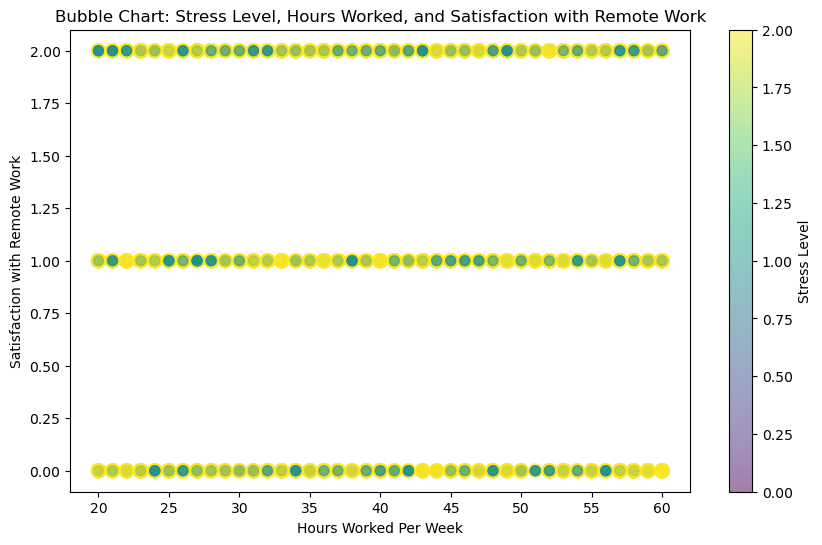

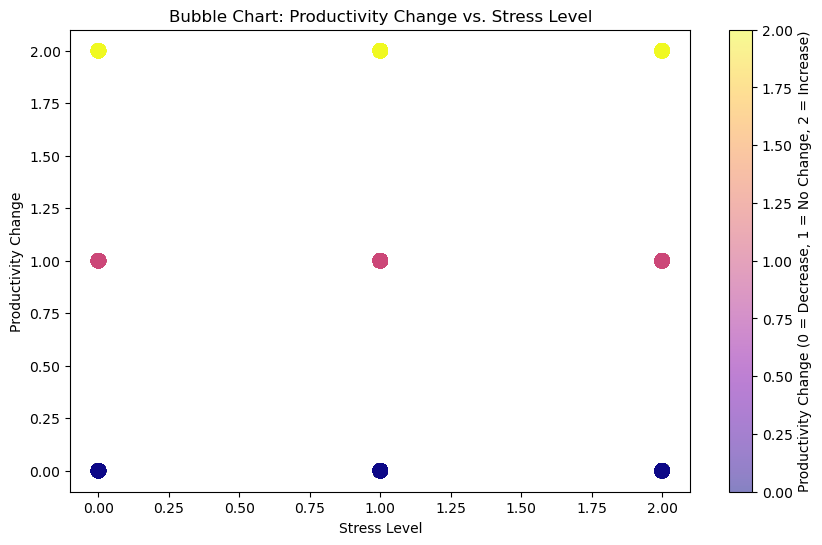

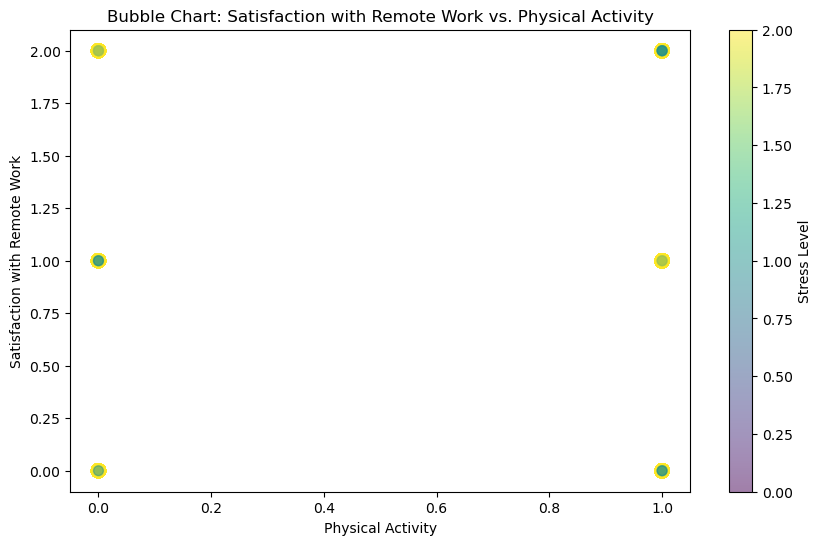

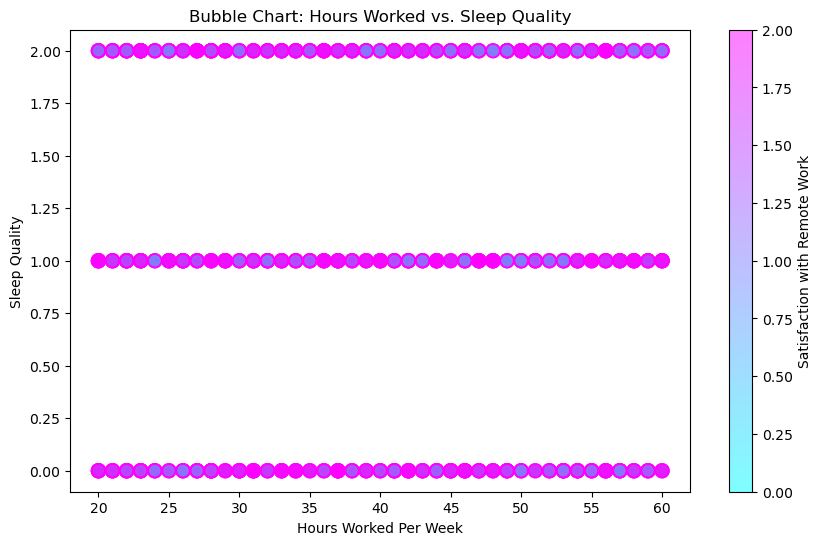

In [77]:
# Bubble chart of 'Hours_Worked_Per_Week', 'Satisfaction_with_Remote_Work', and 'Stress_Level'
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Worked_Per_Week'], df['Satisfaction_with_Remote_Work'], 
            s=df['Stress_Level'] * 50, alpha=0.5, c=df['Stress_Level'], cmap='viridis')
plt.title('Bubble Chart: Stress Level, Hours Worked, and Satisfaction with Remote Work')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Satisfaction with Remote Work')
plt.colorbar(label='Stress Level')
plt.show()

# Bubble chart of Productivity Change vs. Stress Level, with Bubble Size as Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
plt.scatter(df['Stress_Level'], df['Productivity_Change'], 
            s=df['Satisfaction_with_Remote_Work'] * 50, alpha=0.5, 
            c=df['Productivity_Change'], cmap='plasma')
plt.title('Bubble Chart: Productivity Change vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Productivity Change')
plt.colorbar(label='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.show()

# Bubble chart of Satisfaction with Remote Work vs. Physical Activity, Bubble Size as Stress Level
plt.figure(figsize=(10, 6))
plt.scatter(df['Physical_Activity'], df['Satisfaction_with_Remote_Work'], 
            s=df['Stress_Level'] * 50, alpha=0.5, c=df['Stress_Level'], cmap='viridis')
plt.title('Bubble Chart: Satisfaction with Remote Work vs. Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Satisfaction with Remote Work')
plt.colorbar(label='Stress Level')
plt.show()

# Bubble chart of Hours Worked Per Week vs. Sleep Quality, Bubble Size as Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Worked_Per_Week'], df['Sleep_Quality'], 
            s=df['Satisfaction_with_Remote_Work'] * 50, alpha=0.5, 
            c=df['Satisfaction_with_Remote_Work'], cmap='cool')
plt.title('Bubble Chart: Hours Worked vs. Sleep Quality')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Sleep Quality')
plt.colorbar(label='Satisfaction with Remote Work')
plt.show()

<Figure size 1000x600 with 0 Axes>

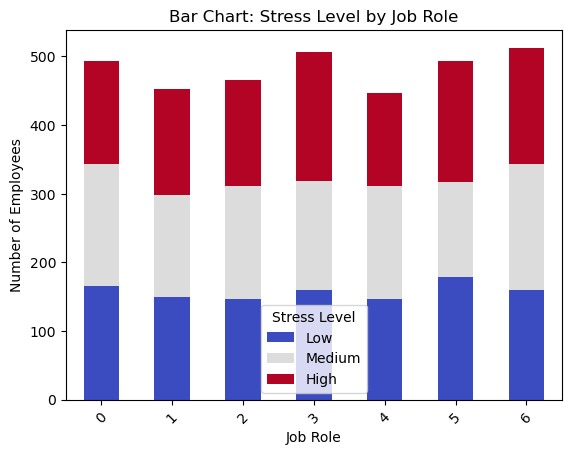

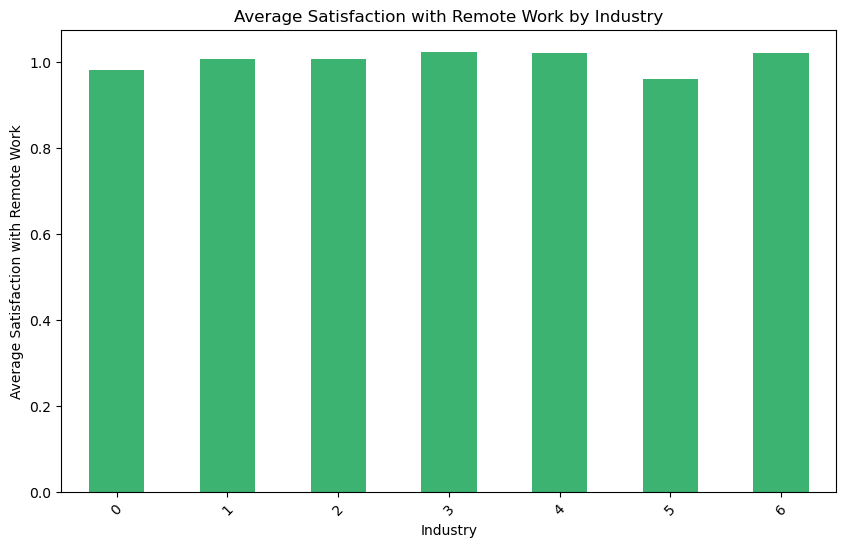

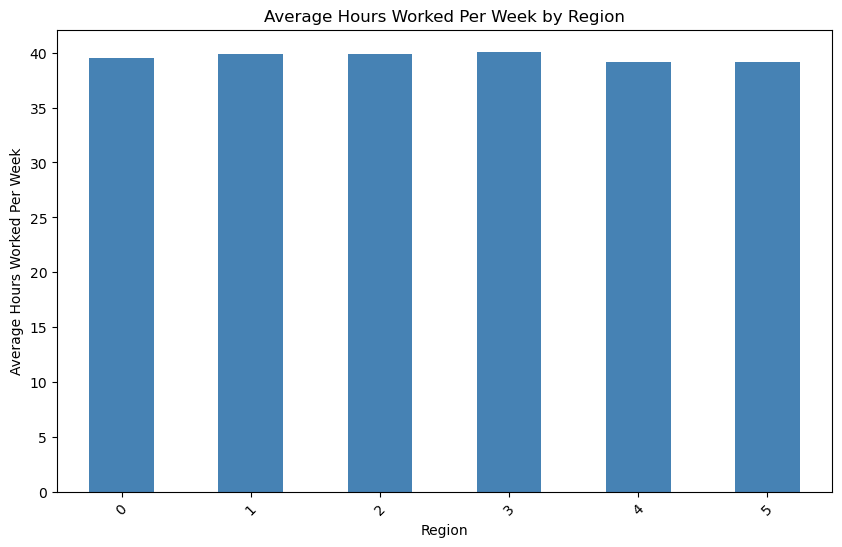

<Figure size 1000x600 with 0 Axes>

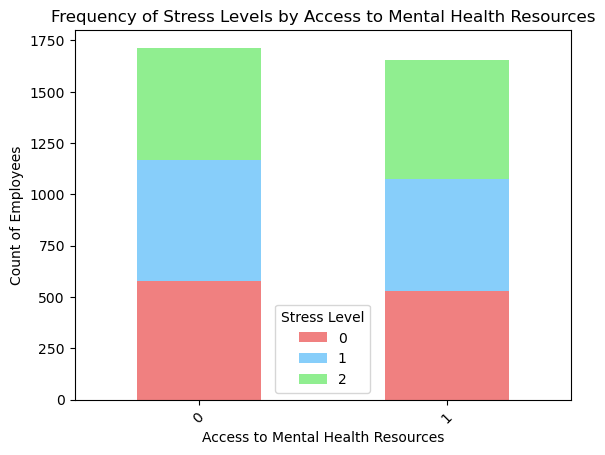

In [78]:
# Bar chart of Stress Level by Job Role
plt.figure(figsize=(10, 6))
stress_by_role = df.groupby('Job_Role')['Stress_Level'].value_counts().unstack().fillna(0)
stress_by_role.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Bar Chart: Stress Level by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Stress Level', labels=['Low', 'Medium', 'High'])
plt.show()

# Bar chart of  Average Satisfaction with Remote Work by Industry
avg_satisfaction_by_industry = df.groupby('Industry')['Satisfaction_with_Remote_Work'].mean()

plt.figure(figsize=(10, 6))
avg_satisfaction_by_industry.plot(kind='bar', color='mediumseagreen')
plt.title('Average Satisfaction with Remote Work by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Satisfaction with Remote Work')
plt.xticks(rotation=45)
plt.show()

# Bar chart of  Average Hours Worked Per Week by Region
avg_hours_by_region = df.groupby('Region')['Hours_Worked_Per_Week'].mean()

plt.figure(figsize=(10, 6))
avg_hours_by_region.plot(kind='bar', color='steelblue')
plt.title('Average Hours Worked Per Week by Region')
plt.xlabel('Region')
plt.ylabel('Average Hours Worked Per Week')
plt.xticks(rotation=45)
plt.show()

# Bar chart of Frequency of Stress Levels by Access to Mental Health Resources
stress_by_access = df.groupby('Access_to_Mental_Health_Resources')['Stress_Level'].value_counts().unstack()

plt.figure(figsize=(10, 6))
stress_by_access.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Frequency of Stress Levels by Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Count of Employees')
plt.legend(title='Stress Level')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Kevin's Corner

def generate_pie_chart(features, data):
    for feature in features:
        keys = data[feature].unique()
        tempData = data[feature].value_counts(dropna=False)

        # define Seaborn color palette to use 
        palette_color = sns.color_palette('bright') 

        # plotting data on chart 
        plt.pie(tempData, labels=keys, colors=palette_color, autopct='%.0f%%') 
        plt.title(feature)
    
        # displaying chart 
        plt.show() 

def generate_boxplot(features, data):
    fig, axs = plt.subplots(1, len(features))
    for i, ax in enumerate(axs.flat):
        ax.boxplot(data[features[i]], showmeans=True)
        ax.set_title(features[i])
        # plt.boxplot(x=df[features[i]], label=features[i], showmeans=True)

    plt.tight_layout()

def generate_violinplot(features, data):
    fig, axs = plt.subplots(len(features))
    for i, ax in enumerate(axs):
        ax.violinplot(data[features[i]], vert=False)
        ax.set_title(features[i])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()


'''
Each feature is well balanced between all of the values that appears in them
No need to conduct SMOTE balancing

The boxplot shows that there are no outliers in any of the columns

The violin plot shows that the distribution of data in the columns is balanced

More complicated visualizations should be utilized to see clearer patterns
'''

cat_features = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Work_Life_Balance_Rating', 
                'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 
                'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region',]
# generate_pie_chart(cat_features, df)

noncat_features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',]
# generate_boxplot(noncat_features, df)
# generate_violinplot(noncat_features, df)

0


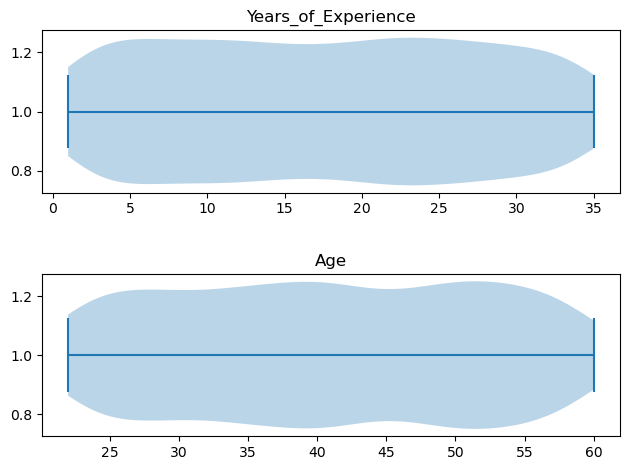

1


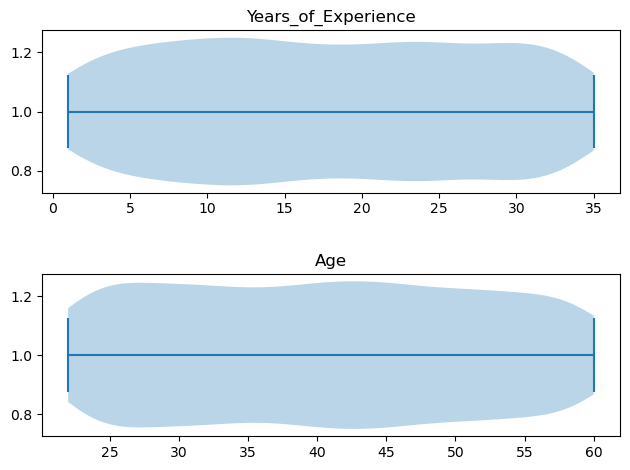

2


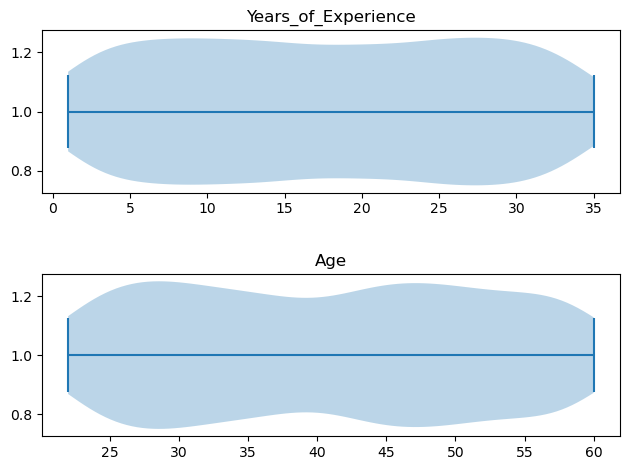

3


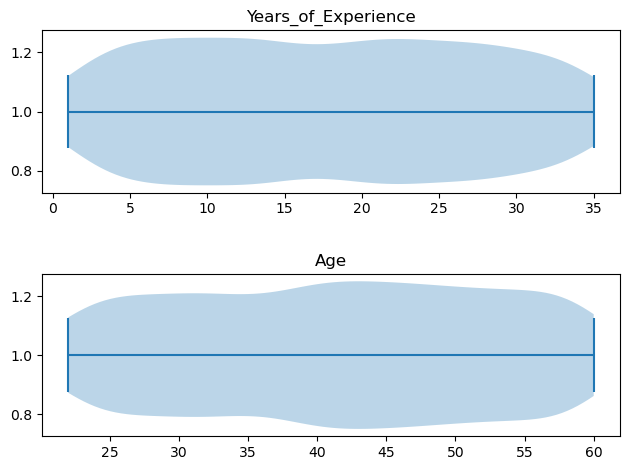

0


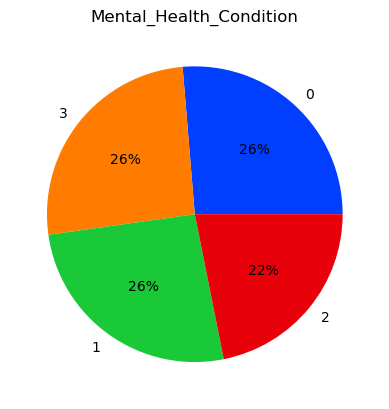

1


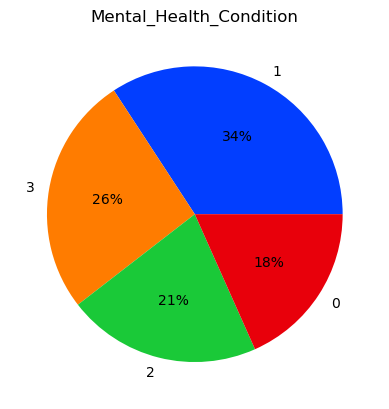

3


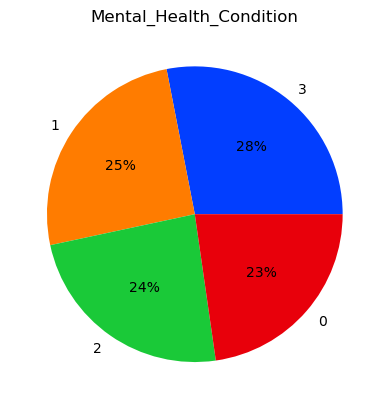

2


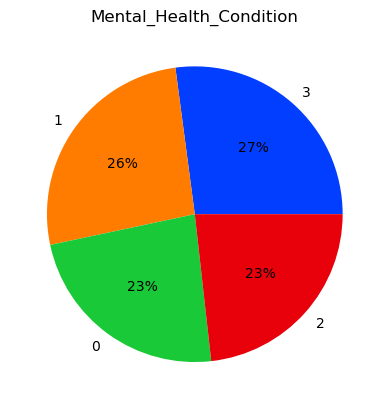

4


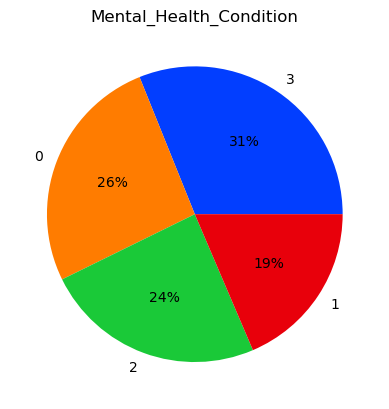

5


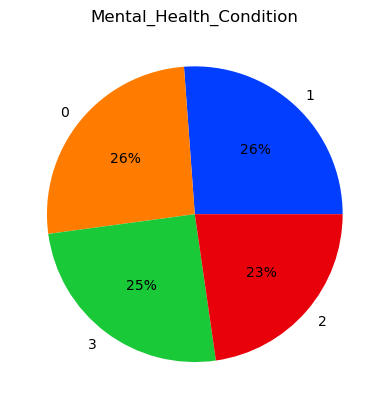

6


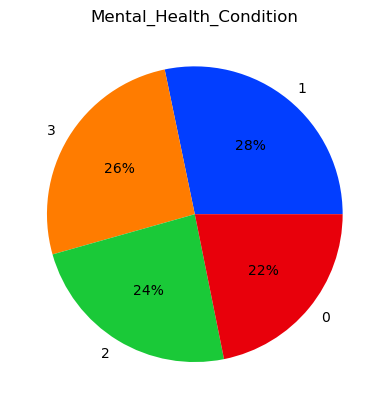

In [80]:
''' Complex Visualizations

noncategorical
Age	    Years_of_Experience     Hours_Worked_Per_Week   Number_of_Virtual_Meetings	

categorical
Gender	Job_Role	Industry	Work_Location   Work_Life_Balance_Rating	
Stress_Level	Mental_Health_Condition	Access_to_Mental_Health_Resources	
Productivity_Change	Social_Isolation_Rating	Satisfaction_with_Remote_Work	
Company_Support_for_Remote_Work	Physical_Activity	Sleep_Quality	Region
'''

# Violin plot
noncat_features = ['Years_of_Experience', 'Age']
for item in df['Gender'].unique():
    print(item)
    generate_violinplot(noncat_features, df[df['Gender'] == item])

# Pie Chart
cat_features = ['Mental_Health_Condition']
for item in df['Job_Role'].unique():
    print(item)
    generate_pie_chart(cat_features, df[df['Job_Role'] == item])

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

noncat_features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',]
target_df = df['Mental_Health_Condition']
features_df = df.drop(['Mental_Health_Condition'], axis=1)

# Standard Scaled
standardized_df = features_df.copy()
standardized_df[noncat_features] = StandardScaler().fit_transform(standardized_df[noncat_features])

# Min Max Scaled
minmax_df = features_df.copy()
minmax_df[noncat_features] = MinMaxScaler().fit_transform(minmax_df[noncat_features])

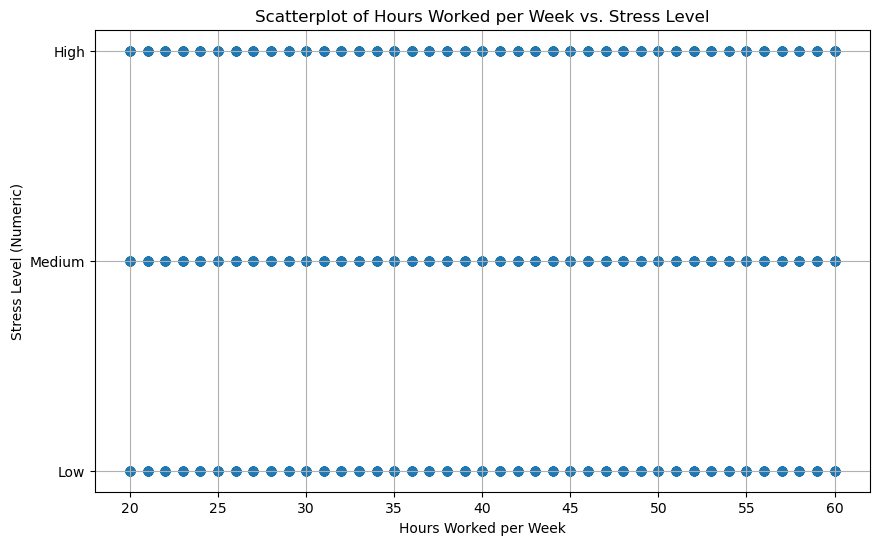

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
# Mapping Stress_Level to numerical values for plotting purposes
data = pd.read_csv("dataset/Impact_of_Remote_Work_on_Mental_Health.csv")
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_mapping)

# Plotting the scatterplot for "Stress_Level" against "Hours_Worked_Per_Week"
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours_Worked_Per_Week'], data['Stress_Level_Numeric'], alpha=0.7)
plt.title('Scatterplot of Hours Worked per Week vs. Stress Level')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Stress Level (Numeric)')
plt.yticks([1, 2, 3], ['Low', 'Medium', 'High'])  # Label y-axis with original stress levels
plt.grid(True)
plt.show()


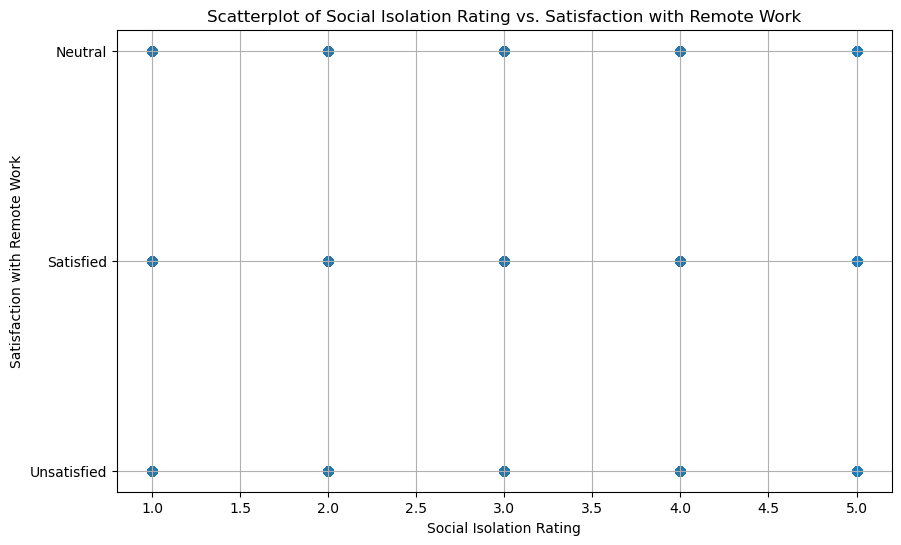

In [83]:
# Filtering out rows with missing values in relevant columns for Social_Isolation_Rating and Satisfaction_with_Remote_Work
filtered_data = data[['Social_Isolation_Rating', 'Satisfaction_with_Remote_Work']].dropna()

# Plotting the scatterplot for Social_Isolation_Rating vs Satisfaction_with_Remote_Work
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Social_Isolation_Rating'], filtered_data['Satisfaction_with_Remote_Work'], alpha=0.7)
plt.title('Scatterplot of Social Isolation Rating vs. Satisfaction with Remote Work')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Satisfaction with Remote Work')
plt.grid(True)
plt.show()

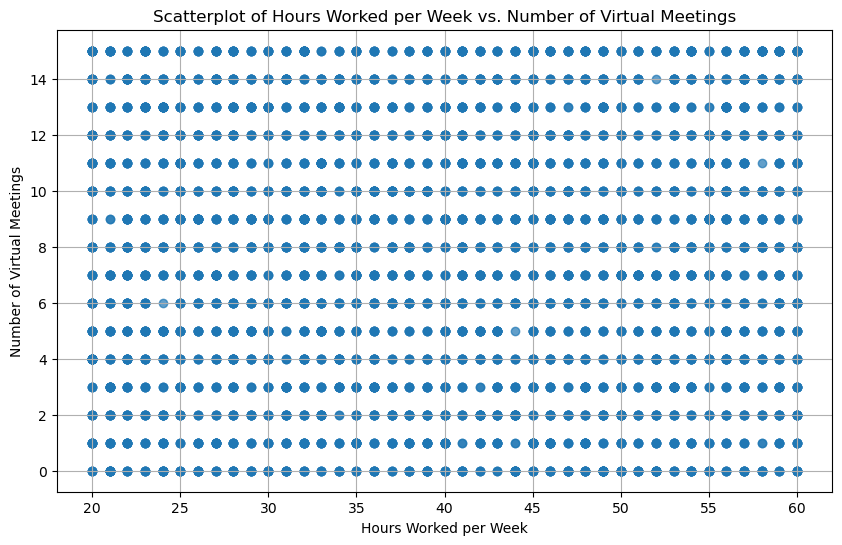

In [84]:
# Filtering out rows with missing values in relevant columns for Hours_Worked_Per_Week and Number_of_Virtual_Meetings
filtered_data = data[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']].dropna()

# Plotting the scatterplot for Hours_Worked_Per_Week vs Number_of_Virtual_Meetings
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Hours_Worked_Per_Week'], filtered_data['Number_of_Virtual_Meetings'], alpha=0.7)
plt.title('Scatterplot of Hours Worked per Week vs. Number of Virtual Meetings')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Number of Virtual Meetings')
plt.grid(True)
plt.show()

In [85]:
# check for anomalies in hours worked per week using IQR (no anomalies)
Q1_a = df['Hours_Worked_Per_Week'].quantile(0.25)
Q3_a = df['Hours_Worked_Per_Week'].quantile(0.75)
IQR_a = Q3_a - Q1_a
lowerbound_a = Q1_a - 1.5 * IQR_a
upperbound_a = Q3_a + 1.5 * IQR_a
anomalies_a = df[(df['Hours_Worked_Per_Week'] < lowerbound_a) | (df['Hours_Worked_Per_Week'] > upperbound_a)]
print('Anomalies:\n', anomalies_a)

Anomalies:
 Empty DataFrame
Columns: [Age, Gender, Job_Role, Industry, Years_of_Experience, Work_Location, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Physical_Activity, Sleep_Quality, Region]
Index: []


In [86]:
# check for anomalies in number of virtual meetings using IQR (no anomalies)
Q1_b = df['Number_of_Virtual_Meetings'].quantile(0.25)
Q3_b = df['Number_of_Virtual_Meetings'].quantile(0.75)
IQR_b = Q3_b - Q1_b
lowerbound_b = Q1_b - 1.5 * IQR_b
upperbound_b = Q3_b + 1.5 * IQR_b
anomalies_b = df[(df['Number_of_Virtual_Meetings'] < lowerbound_b) | (df['Number_of_Virtual_Meetings'] > upperbound_b)]
print('Anomalies:\n', anomalies_b)

Anomalies:
 Empty DataFrame
Columns: [Age, Gender, Job_Role, Industry, Years_of_Experience, Work_Location, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Physical_Activity, Sleep_Quality, Region]
Index: []


In [87]:
# check for anomalies in years of experience using IQR (no anomalies)
Q1_c = df['Years_of_Experience'].quantile(0.25)
Q3_c = df['Years_of_Experience'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lowerbound_c = Q1_c - 1.5 * IQR_c
upperbound_c = Q3_c + 1.5 * IQR_c
anomalies_c = df[(df['Years_of_Experience'] < lowerbound_c) | (df['Years_of_Experience'] > upperbound_c)]
print('Anomalies:\n', anomalies_c)

Anomalies:
 Empty DataFrame
Columns: [Age, Gender, Job_Role, Industry, Years_of_Experience, Work_Location, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Physical_Activity, Sleep_Quality, Region]
Index: []


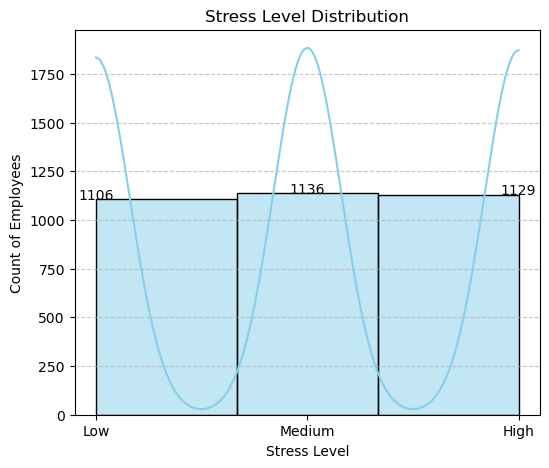

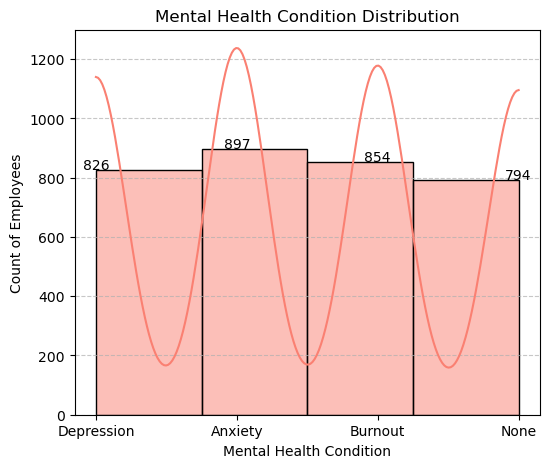

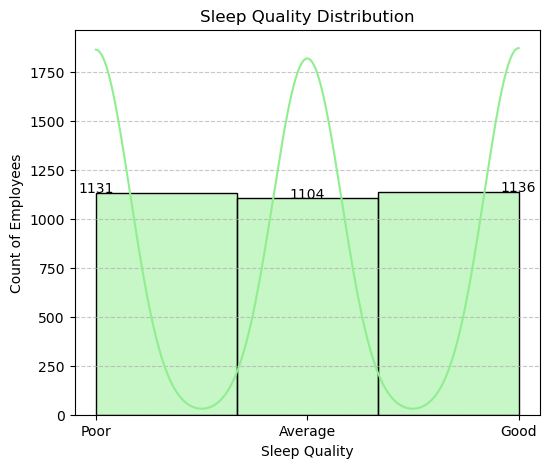

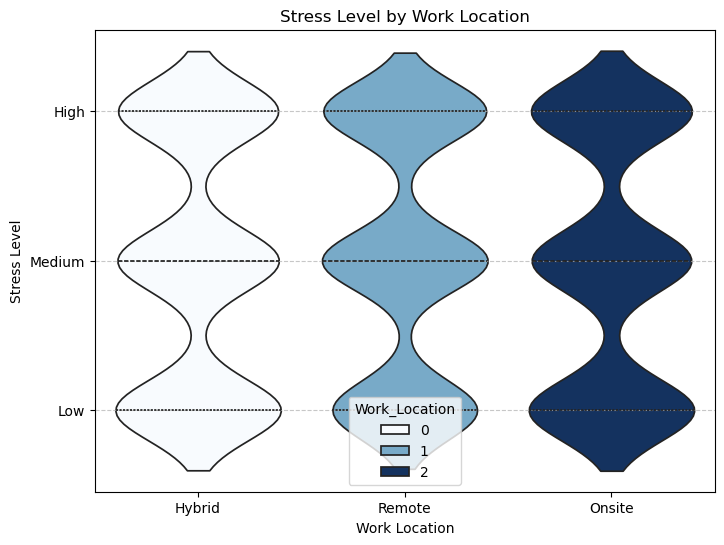

In [88]:
# Histogram (Johnny):
# Histogram 1: Stress Level Distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['Stress_Level'], bins=3, kde=True, color='skyblue', edgecolor='black')
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count of Employees")
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding counts above each bar for Stress Level Distribution
for index, value in enumerate(df['Stress_Level'].value_counts().sort_index()):
    plt.text(index, value + 0.5, str(value), ha='center', color='black')

plt.show()

# Histogram 2: Mental Health Condition Distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['Mental_Health_Condition'], bins=4, kde=True, color='salmon', edgecolor='black')
plt.title("Mental Health Condition Distribution")
plt.xlabel("Mental Health Condition")
plt.ylabel("Count of Employees")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Depression', 'Anxiety', 'Burnout', 'None'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding counts above each bar for Mental Health Condition
for index, value in enumerate(df['Mental_Health_Condition'].value_counts().sort_index()):
    plt.text(index, value + 0.5, str(value), ha='center', color='black')

plt.show()

# Histogram 3: Sleep Quality Distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['Sleep_Quality'], bins=3, kde=True, color='lightgreen', edgecolor='black')
plt.title("Sleep Quality Distribution")
plt.xlabel("Sleep Quality")
plt.ylabel("Count of Employees")
plt.xticks(ticks=[0, 1, 2], labels=['Poor', 'Average', 'Good'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding counts above each bar for Sleep Quality
for index, value in enumerate(df['Sleep_Quality'].value_counts().sort_index()):
    plt.text(index, value + 0.5, str(value), ha='center', color='black')

plt.show()

# Violin Plots (Johnny):
# Violin Plot 1: Stress Level by Work Location
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='Work_Location', 
    y='Stress_Level', 
    data=df, 
    inner="quartile", 
    hue='Work_Location',
    density_norm='count',
    palette="Blues"
)
plt.title("Stress Level by Work Location")
plt.xlabel("Work Location")
plt.ylabel("Stress Level")
plt.xticks(ticks=[0, 1, 2], labels=['Hybrid', 'Remote', 'Onsite'])
plt.yticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Individual Models


NN with default params training Set evaluation:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       651
           1       0.56      0.59      0.57       729
           2       0.55      0.54      0.54       688
           3       0.57      0.52      0.54       628

    accuracy                           0.56      2696
   macro avg       0.56      0.55      0.55      2696
weighted avg       0.56      0.56      0.55      2696


NN with default parameters gives warning that the model has not converged with the current number of iterations.


C:\Users\johnn\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


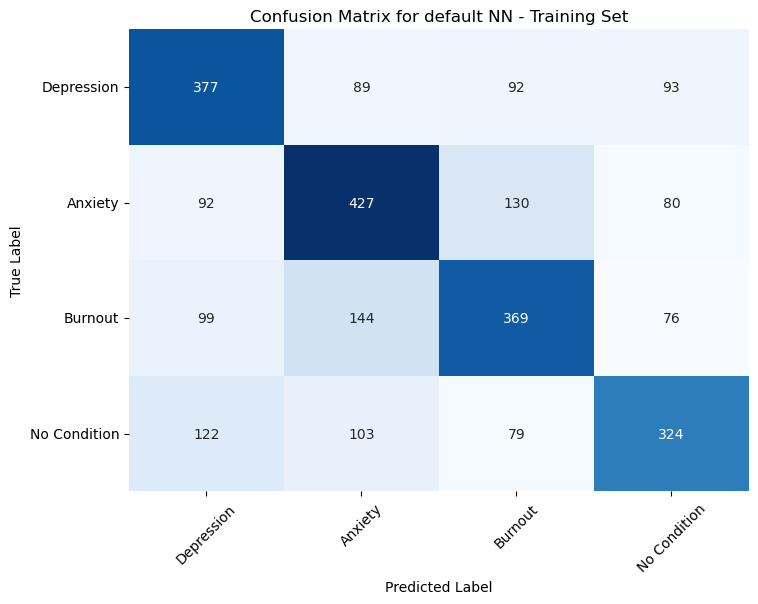


NN with default params test Set Evaluation:
              precision    recall  f1-score   support

           0       0.28      0.26      0.27       175
           1       0.23      0.26      0.25       168
           2       0.24      0.28      0.26       166
           3       0.24      0.20      0.22       166

    accuracy                           0.25       675
   macro avg       0.25      0.25      0.25       675
weighted avg       0.25      0.25      0.25       675



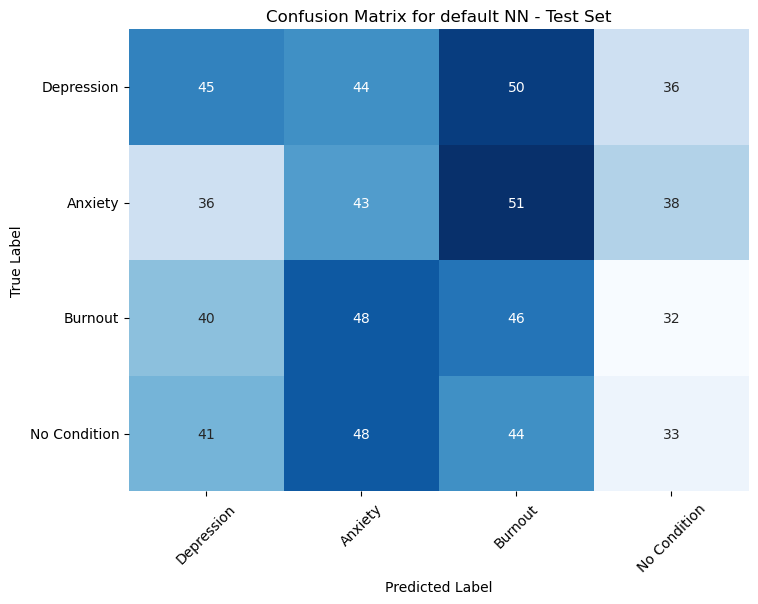

Default NN is performing poorly on testing splits, but well on training split.


In [90]:
## Nueral Network (Mohand) ##
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Reusable function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'], yticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.grid(False)
    plt.show()

# Split df into features and target (X, y)
X = df.drop('Mental_Health_Condition', axis=1)
y = df['Mental_Health_Condition']

# Scale features with standard sclaer
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets 
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(X, y, train_size=0.8)

# NN with default params and train
default_NN = MLPClassifier()
default_NN.fit(X_trainNN, y_trainNN)

# Make predictions on both splits for evaluation
y_trainNN_pred = default_NN.predict(X_trainNN)
y_testNN_pred = default_NN.predict(X_testNN)

# Evaluation of default NN
print("\nNN with default params training Set evaluation:")
print(classification_report(y_trainNN, y_trainNN_pred))
print('\nNN with default parameters gives warning that the model has not converged with the current number of iterations.')
plot_confusion_matrix(y_trainNN, y_trainNN_pred, title='Confusion Matrix for default NN - Training Set')
print("\nNN with default params test Set Evaluation:")
print(classification_report(y_testNN, y_testNN_pred))
plot_confusion_matrix(y_testNN, y_testNN_pred, title='Confusion Matrix for default NN - Test Set')
print('Default NN is performing poorly on testing splits, but well on training split.')




Optimized NN Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       651
           1       0.81      0.82      0.82       729
           2       0.73      0.70      0.72       688
           3       0.79      0.82      0.80       628

    accuracy                           0.77      2696
   macro avg       0.77      0.77      0.77      2696
weighted avg       0.77      0.77      0.77      2696



C:\Users\johnn\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


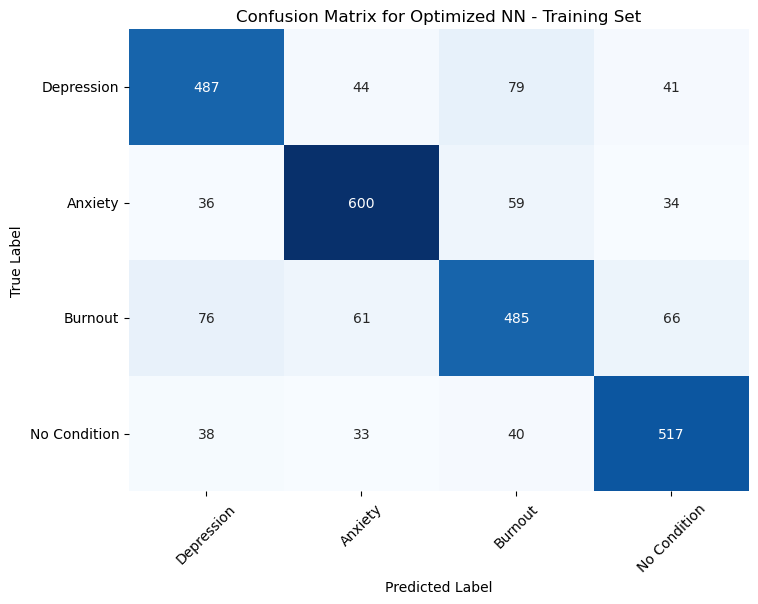


Optimized NN Test Set Evaluation:
              precision    recall  f1-score   support

  Depression       0.32      0.26      0.29       175
     Anxiety       0.20      0.20      0.20       168
     Burnout       0.24      0.25      0.25       166
No Condition       0.25      0.28      0.26       166

    accuracy                           0.25       675
   macro avg       0.25      0.25      0.25       675
weighted avg       0.25      0.25      0.25       675



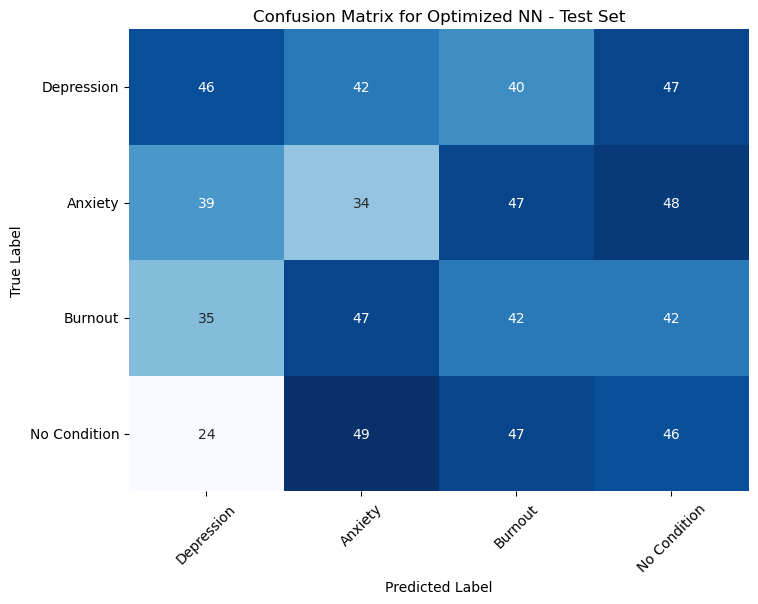


 Currently the optimized model is overfitting the training data and is performing poorly on the testing data, but is still outperforming the default model on the testing data.


In [91]:
# Tune parameters using gridsearchCV to get optimized model
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 800, 1000],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2, 0.3]
}
# Get best paramaters, This will take awhile.
#grid_search = GridSearchCV(default_NN, param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='f1_macro', verbose=0)
#grid_search.fit(X_trainNN, y_trainNN)
#print(grid_search.best_params_)

# Here is the output from the grid search: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
# Gers 100% accuracy on training, 0.24 on testing. overfits

# secondry: {'activation': 'tanh', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam', 'validation_fraction': 0.2}
# does poorly on both training and testing

# Model using best parameters found from the gridsearch above.
#best_NN = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='constant', solver='adam', max_iter=500) .98 trainng, .26 testing
best_NN = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(30, 30), learning_rate='constant', solver='adam', max_iter=1000)

best_NN.fit(X_trainNN, y_trainNN)

#Evaluate the optimized model on the training set
y_trainNN_pred = best_NN.predict(X_trainNN)
print("\nOptimized NN Training Set Evaluation:")
print(classification_report(y_trainNN, y_trainNN_pred))
plot_confusion_matrix(y_trainNN, y_trainNN_pred, title='Confusion Matrix for Optimized NN - Training Set')

# Evaluate the optimized model on the test set
y_testNN_pred = best_NN.predict(X_testNN)
print("\nOptimized NN Test Set Evaluation:")
print(classification_report(y_testNN, y_testNN_pred, target_names=['Depression', 'Anxiety', 'Burnout', 'No Condition']))
plot_confusion_matrix(y_testNN, y_testNN_pred, title='Confusion Matrix for Optimized NN - Test Set')

print('\n Currently the optimized model is overfitting the training data and is performing poorly on the testing data, but is still outperforming the default model on the testing data.')
# Hopefully we can learn how to fix this whenever we do CA4 by learning other regularization techniques, if not, then an ensemble later may fix the overall model.


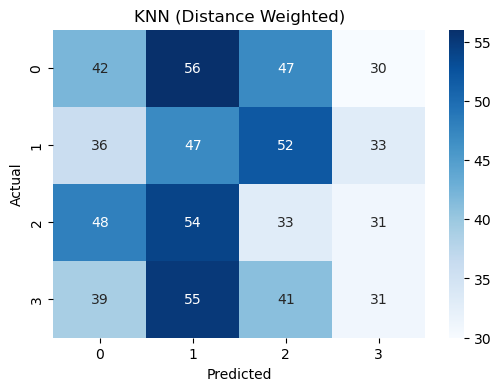

Model: KNN (Distance Weighted)
Accuracy: 0.2267
Precision: 0.2291
Recall: 0.2267
F1 Score: 0.2259



In [92]:
# KNN with distance weights and kd tree algorithm
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(weights = 'distance', algorithm = 'kd_tree')
KNN.fit(X_trainNN, y_trainNN)

knnPredictions = KNN.predict(X_testNN)

def evaluate_model(y_test, y_pred, model_name):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    plt.title(f'{model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Display the results
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')

evaluate_model(y_testNN, knnPredictions, "KNN (Distance Weighted)")

# SVM (Kevin)

In [12]:
# SVM models
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Reusable function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'], yticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.grid(False)
    plt.show()

In [13]:
linear_param_grid = {
    'C': [0.1, 1, 10, 100],
    'decision_function_shape': ['ovo', 'ovr'],
    'kernel': ['linear'],
}

poly_param_grid = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10, 100],
    'decision_function_shape': ['ovo', 'ovr'],
    'degree': [2, 3, 4, 5],  # Degree of the polynomial
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'coef0': [0, 0.1, 1, 10]  # Independent term in the kernel function
}

rbf_param_grid = {
    'kernel': ['rbf'],
    'decision_function_shape': ['ovo', 'ovr'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient
}

sigmoid_param_grid = {
    'kernel': ['sigmoid'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'coef0': [0, 0.1, 1, 10],  # Independent term in the kernel function
    'decision_function_shape': ['ovo', 'ovr'],
}

In [14]:
param_grids = {
    'linear': linear_param_grid,
    # 'poly': poly_param_grid,
    'rbf': rbf_param_grid,
    'sigmoid': sigmoid_param_grid,
}

results = {}
X_train, X_test, y_train, y_test = train_test_split(standardized_df, target_df, train_size=0.8, stratify=target_df, random_state=42)

for kernel, param_grid in param_grids.items():
    print(f'Currently on {kernel} kernel')

    grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X=X_train, y=y_train)
    
    results[kernel] = {'best_params': grid_search.best_params_, 'best_score': grid_search.best_score_}
    
    print(f'Best accuracy score found: {grid_search.best_score_}')

for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"Best Accuracy Score: {metrics['best_score']}")

Currently on linear kernel
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best accuracy score found: 0.2626042740328455
Currently on rbf kernel
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best accuracy score found: 0.2659492888064317
Currently on sigmoid kernel
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best accuracy score found: 0.2663203463203464
Kernel: linear
Best Params: {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best Accuracy Score: 0.2626042740328455
Kernel: rbf
Best Params: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy Score: 0.2659492888064317
Kernel: sigmoid
Best Params: {'C': 100, 'coef0': 0, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'sigmoid'}
Best Accuracy Score: 0.2663203463203464


Kernel: linear


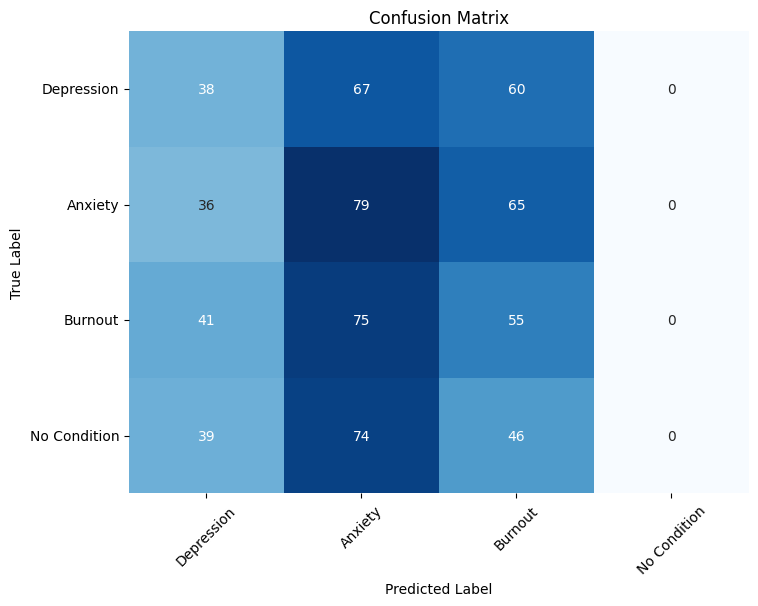

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.25      0.23      0.24       165
           1       0.27      0.44      0.33       180
           2       0.24      0.32      0.28       171
           3       0.00      0.00      0.00       159

    accuracy                           0.25       675
   macro avg       0.19      0.25      0.21       675
weighted avg       0.19      0.25      0.22       675

Kernel: rbf


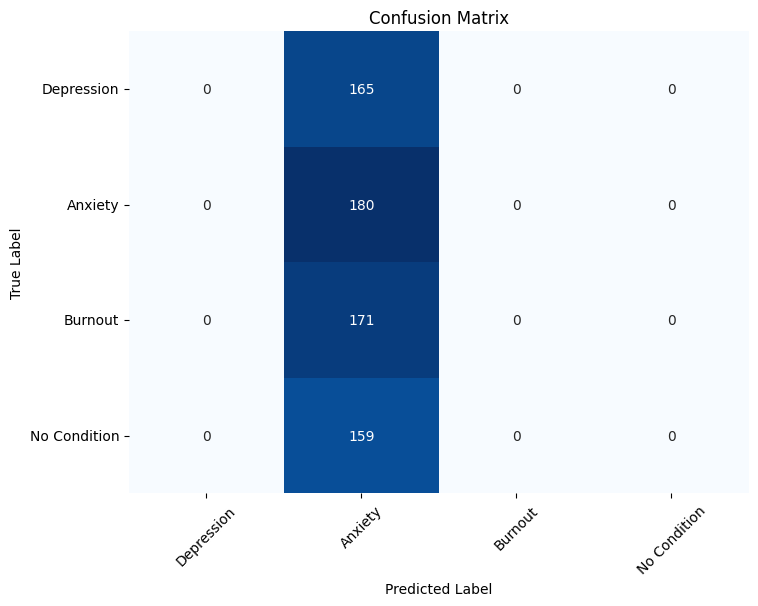

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.27      1.00      0.42       180
           2       0.00      0.00      0.00       171
           3       0.00      0.00      0.00       159

    accuracy                           0.27       675
   macro avg       0.07      0.25      0.11       675
weighted avg       0.07      0.27      0.11       675

Kernel: sigmoid


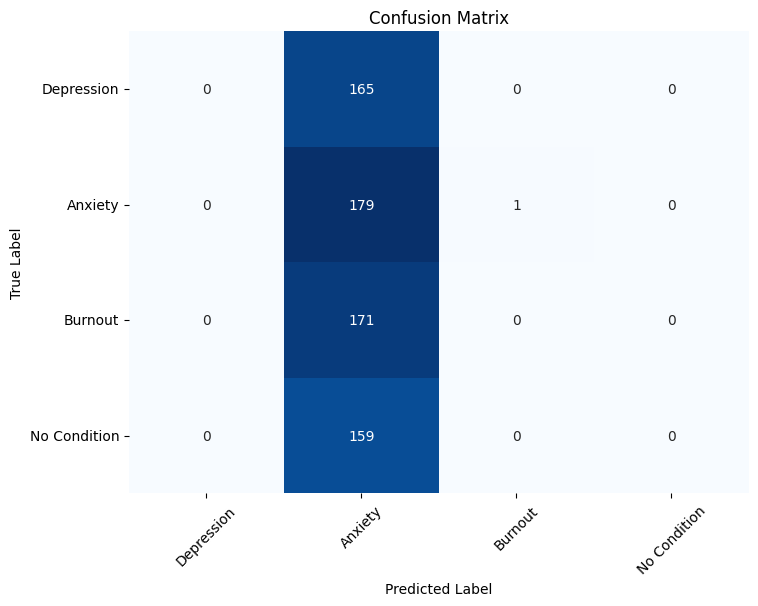

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.27      0.99      0.42       180
           2       0.00      0.00      0.00       171
           3       0.00      0.00      0.00       159

    accuracy                           0.27       675
   macro avg       0.07      0.25      0.10       675
weighted avg       0.07      0.27      0.11       675



c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Testing on test set
test_results = {}
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")

    best_model = SVC(**metrics['best_params'])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    test_results[kernel] = best_model.score(X_test, y_test)

sorted_test_results = sorted(test_results, key=lambda item: item[1])

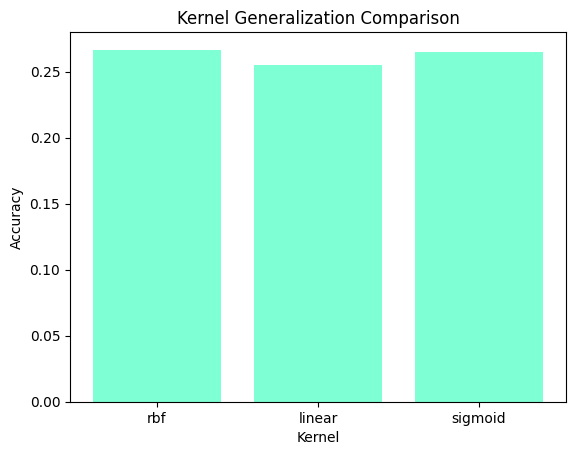

In [16]:
import matplotlib.pyplot as plt

# Visualize the test_results
kernels = sorted_test_results
score_results = [test_results[kernel] for kernel in kernels]

plt.bar(kernels, score_results, color='aquamarine')
plt.title('Kernel Generalization Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

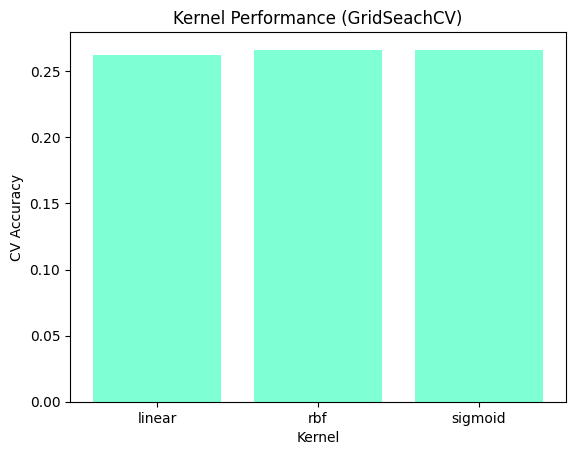

In [17]:
import matplotlib.pyplot as plt

# Visualize the kernels from gridsearch
grid_results = results

kernels = list(grid_results.keys())
grid_scores = [grid_results[kernel]['best_score'] for kernel in kernels]

plt.bar(kernels, grid_scores, color='aquamarine')
plt.title('Kernel Performance (GridSeachCV)')
plt.xlabel('Kernel')
plt.ylabel('CV Accuracy')
plt.show()

In [18]:
param_grids = {
    'linear': linear_param_grid,
    # 'poly': poly_param_grid,
    'rbf': rbf_param_grid,
    'sigmoid': sigmoid_param_grid,
}

results = {}
X_train, X_test, y_train, y_test = train_test_split(minmax_df, target_df, train_size=0.8, stratify=target_df, random_state=42)

for kernel, param_grid in param_grids.items():
    print(f'Currently on {kernel} kernel')

    grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X=X_train, y=y_train)
    
    results[kernel] = {'best_params': grid_search.best_params_, 'best_score': grid_search.best_score_}
    
    print(f'Best accuracy score found: {grid_search.best_score_}')

for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"Best Accuracy Score: {metrics['best_score']}")

Currently on linear kernel
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best accuracy score found: 0.26668384525527383
Currently on rbf kernel
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best accuracy score found: 0.26632034632034635
Currently on sigmoid kernel
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best accuracy score found: 0.2659492888064317
Kernel: linear
Best Params: {'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best Accuracy Score: 0.26668384525527383
Kernel: rbf
Best Params: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy Score: 0.26632034632034635
Kernel: sigmoid
Best Params: {'C': 0.1, 'coef0': 0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Accuracy Score: 0.2659492888064317


Kernel: linear


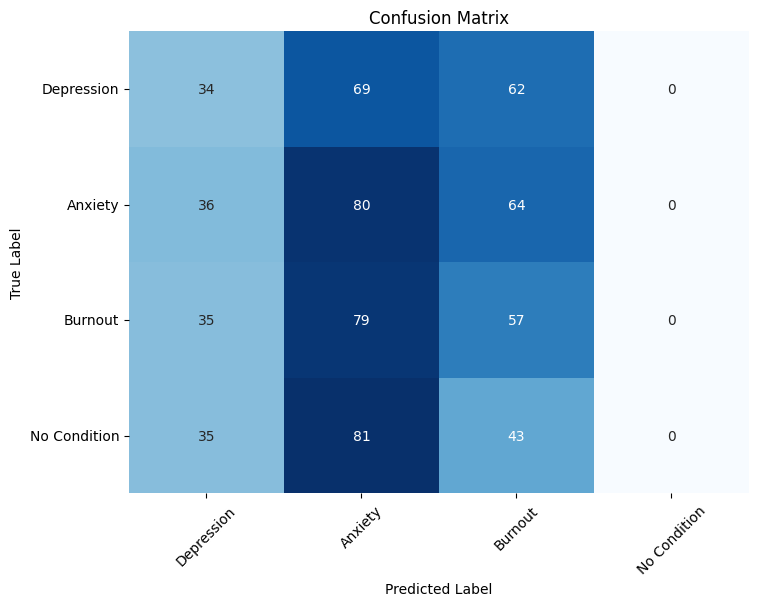

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.24      0.21      0.22       165
           1       0.26      0.44      0.33       180
           2       0.25      0.33      0.29       171
           3       0.00      0.00      0.00       159

    accuracy                           0.25       675
   macro avg       0.19      0.25      0.21       675
weighted avg       0.19      0.25      0.21       675

Kernel: rbf


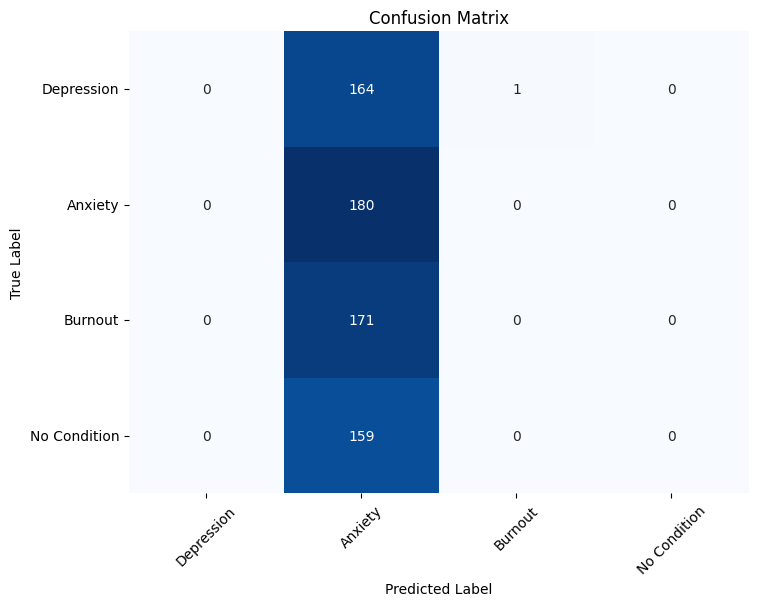

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.27      1.00      0.42       180
           2       0.00      0.00      0.00       171
           3       0.00      0.00      0.00       159

    accuracy                           0.27       675
   macro avg       0.07      0.25      0.11       675
weighted avg       0.07      0.27      0.11       675

Kernel: sigmoid


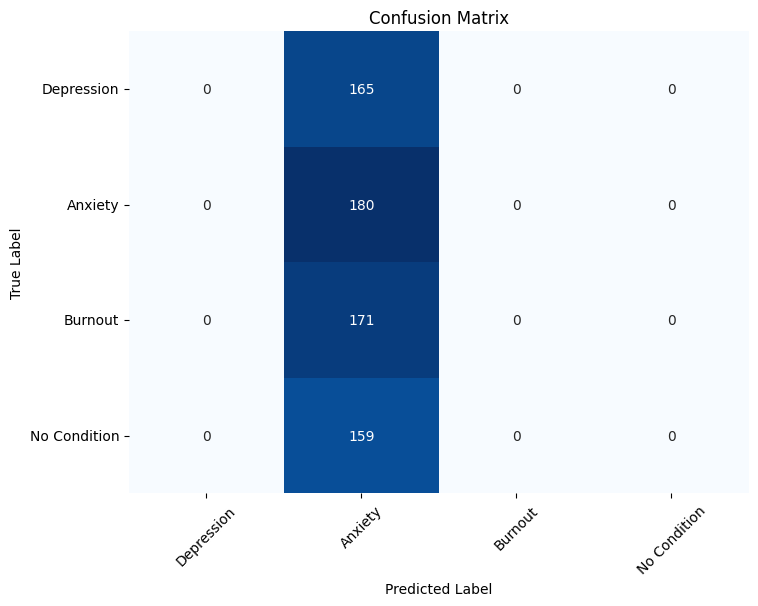

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.27      1.00      0.42       180
           2       0.00      0.00      0.00       171
           3       0.00      0.00      0.00       159

    accuracy                           0.27       675
   macro avg       0.07      0.25      0.11       675
weighted avg       0.07      0.27      0.11       675



c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Testing on test set
test_results = {}
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")

    best_model = SVC(**metrics['best_params'])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    test_results[kernel] = best_model.score(X_test, y_test)

sorted_test_results = sorted(test_results, key=lambda item: item[1])

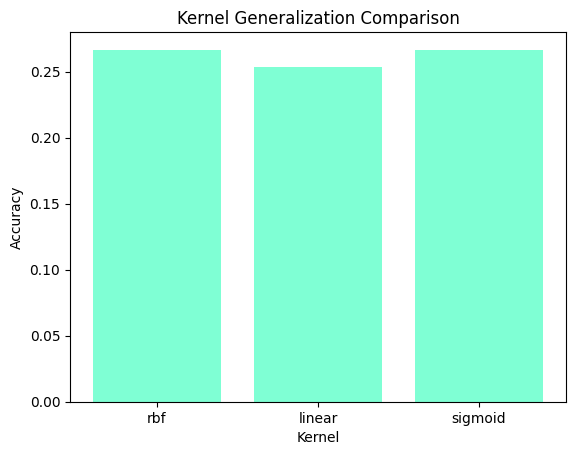

In [20]:
import matplotlib.pyplot as plt

# Visualize the test_results
kernels = sorted_test_results
score_results = [test_results[kernel] for kernel in kernels]

plt.bar(kernels, score_results, color='aquamarine')
plt.title('Kernel Generalization Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

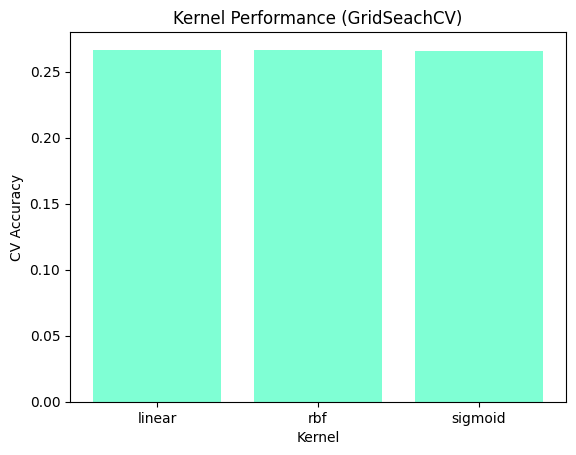

In [21]:
import matplotlib.pyplot as plt

# Visualize the kernels from gridsearch
grid_results = results

kernels = list(grid_results.keys())
grid_scores = [grid_results[kernel]['best_score'] for kernel in kernels]

plt.bar(kernels, grid_scores, color='aquamarine')
plt.title('Kernel Performance (GridSeachCV)')
plt.xlabel('Kernel')
plt.ylabel('CV Accuracy')
plt.show()